<a href="https://colab.research.google.com/github/Avishek2020/A-to-Z-Resources-for-Students/blob/master/SineWavesWithNoise_Correlation_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
# frequency is the number of times a wave repeats a second 
frequency, noisy_freq, num_samples = (1000, 200, 48000) 
# The sampling rate of the analog to digital convert 
sampling_rate = 48000.0

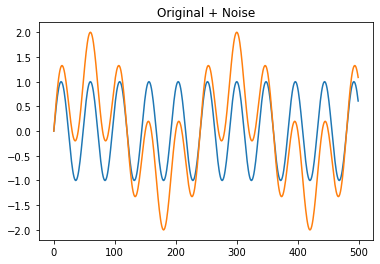

In [282]:
#Create the sine wave and noise 
sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)] 
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)] 

sine_fft = np.fft.ifft(sine_wave)
sine_fft1 = np.fft.ifft(sine_noise)
#Convert them to numpy arrays 
sine_wave = np.array(sine_wave) 
sine_noise = np.array(sine_noise)
# Add them to create a noisy signal 
combined_signal = sine_wave + sine_noise
plt.plot(sine_wave[:500]) 
plt.title("Original sine wave") 
plt.title("Noisy wave") 
#plt.plot(sine_noise[:500]) 
plt.title("Original + Noise") 
plt.plot(combined_signal[:500]) 

plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


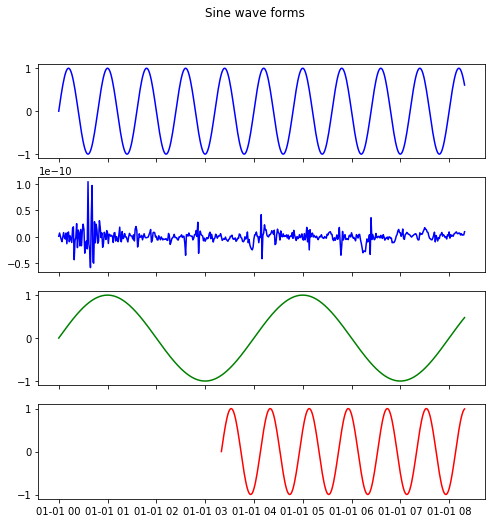

/usr/local/lib/python3.6/dist-packages/pandas/core/internals/managers.py:902: ComplexWarning: Casting complex values to real discards the imaginary part
  result[rl.indexer] = arr


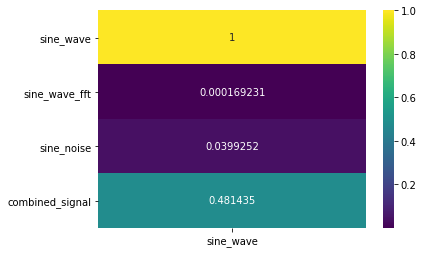

In [307]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import signal

def sine_waves_dataset_small():

    # frequency is the number of times a wave repeats a second
    frequency, noisy_freq, num_samples = (1000, 200, 48000)

    # The sampling rate of the analog to digital convert
    sampling_rate = 48000.0

    start_date: str = '01-01-2021'
    x_date = pd.date_range(start = start_date, periods = len(range(num_samples)), freq = 'min')
    x_df_date = pd.DataFrame(x_date, columns = ['Datetime'])



    # Create the sine wave and noise
    sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]
    sine_noise = [np.sin(2 * np.pi * noisy_freq * x1 / sampling_rate) for x1 in range(num_samples)]

    sine_wave_fft = np.fft.fft(sine_wave)

    # Convert them to pandas dataframe
    v1_df_sine_wave = pd.DataFrame(sine_wave, columns = ['sine_wave'])

    v2_df_sine_noise = pd.DataFrame(sine_noise, columns = ['sine_noise'])

    # Add them to create a noisy signal
    combined_signal = sine_wave + sine_noise


    v3_df_combine_noise = pd.DataFrame(combined_signal, columns = ['combined_signal'])

    v4_df_sine_wave_fft = pd.DataFrame(sine_wave_fft, columns = ['sine_wave_fft'])

 

    df = pd.concat([x_df_date, v1_df_sine_wave, v4_df_sine_wave_fft, v2_df_sine_noise, v3_df_combine_noise.shift(200)], axis = 1)

    return df

def main():
    # dataset_correlation_small_set = dataset_correlation_small()
    df = sine_waves_dataset_small()
    df.set_index("Datetime", inplace = True)
    fig, axs = plt.subplots(4, figsize = (8, 8), sharex = True)
    fig.suptitle("Sine wave forms")
    limit_data_points = 500
     
    axs[0].plot(df["sine_wave"][:limit_data_points], color = 'blue', linestyle = 'solid')
    axs[1].plot(df["sine_wave_fft"][:limit_data_points], color = 'blue', linestyle = 'solid')
    axs[2].plot(df["sine_noise"][:limit_data_points], color = 'green', linestyle = 'solid')
    axs[3].plot(df["combined_signal"][:limit_data_points], color = 'red', linestyle = 'solid')
    #axs[4].plot(df["combined_signal"][:limit_data_points], color = 'red', linestyle = 'solid')
    plt.show()


if __name__ == '__main__':
    main()
corr_full = df_all.corr('spearman')
corr_full

dfnew = pd.DataFrame(corr_full['sine_wave'],
              index=corr_full.index)

sns.heatmap(dfnew, annot=True, fmt="g", cmap='viridis')

plt.show()

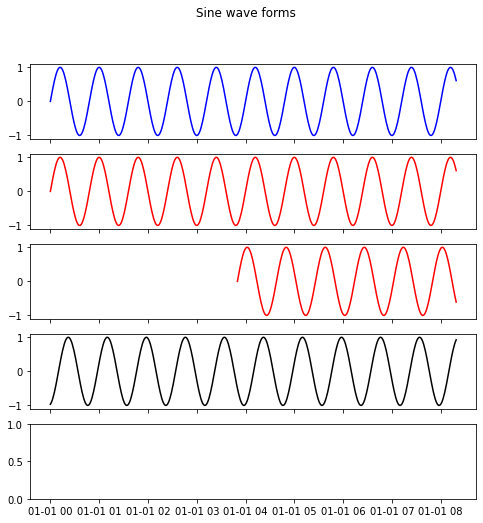

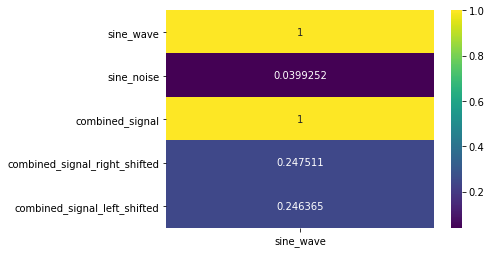

In [331]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import signal

def sine_waves_dataset_small2():

    # frequency is the number of times a wave repeats a second
    frequency, noisy_freq, num_samples = (1000, 200, 48000)

    # The sampling rate of the analog to digital convert
    sampling_rate = 48000.0

    start_date: str = '01-01-2021'
    x_date = pd.date_range(start = start_date, periods = len(range(num_samples)), freq = 'min')
    x_df_date = pd.DataFrame(x_date, columns = ['Datetime'])



    # Create the sine wave and noise
    
    sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]
    sine_noise = [np.sin(2 * np.pi * noisy_freq * x1 / sampling_rate) for x1 in range(num_samples)]

     
    # Convert them to pandas dataframe
    v1_df_sine_wave = pd.DataFrame(sine_wave, columns = ['sine_wave'])

    v2_df_sine_noise = pd.DataFrame(sine_noise, columns = ['sine_noise'])

    # Add them to create a noisy signal
    combined_signal = sine_wave + sine_noise


    v3_df_combine_noise = pd.DataFrame(combined_signal, columns = ['combined_signal']) 
    v3_df_combine_noise_rshift = pd.DataFrame(combined_signal, columns = ['combined_signal_right_shifted']) 
    v3_df_combine_noise_lshift = pd.DataFrame(combined_signal, columns = ['combined_signal_left_shifted']) 

    df = pd.concat([x_df_date, v1_df_sine_wave, v2_df_sine_noise, v3_df_combine_noise, v3_df_combine_noise_rshift.shift(230, axis=0), v3_df_combine_noise_lshift.shift(-230, axis=0)], axis = 1)

    return df

def main():
    # dataset_correlation_small_set = dataset_correlation_small()
    df = sine_waves_dataset_small()
    df.set_index("Datetime", inplace = True)
    fig, axs = plt.subplots(5, figsize = (8, 8), sharex = True)
    fig.suptitle("Sine wave forms")
    limit_data_points = 500
     
    axs[0].plot(df["sine_wave"][:limit_data_points], color = 'blue', linestyle = 'solid')   
    axs[1].plot(df["combined_signal"][:limit_data_points], color = 'red', linestyle = 'solid')
    axs[2].plot(df["combined_signal_right_shifted"][:limit_data_points], color = 'red', linestyle = 'solid')
    axs[3].plot(df["combined_signal_left_shifted"][:limit_data_points], color = 'black', linestyle = 'solid')
    #axs[4].plot(df["combined_signal"][:limit_data_points], color = 'red', linestyle = 'solid')
    plt.show()


if __name__ == '__main__':
    main()

df_all =sine_waves_dataset_small2()
corr_full = df_all.corr('spearman')
corr_full

dfnew = pd.DataFrame(corr_full['sine_wave'],
              index=corr_full.index)

sns.heatmap(dfnew, annot=True, fmt="g", cmap='viridis')

plt.show()

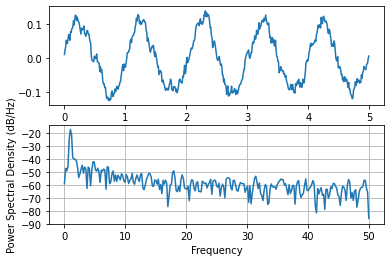

In [346]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 5, dt)
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)

cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]
s = 0.1 * np.sin(2 * np.pi * t) + cnse

 
plt.subplot(211)
plt.plot(t, s)
plt.subplot(212)
plt.psd(s, 512, 1 / dt)

plt.show()